In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch

In [2]:
# 1. Load Dataset
# =====================
file_path = r"C:\Users\admin\Downloads\Excelr Assignment\Clustering\Clustering\EastWestAirlines.xlsx"
df = pd.read_excel(file_path, sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
# Drop ID column (not useful for clustering)
data = df.drop(columns=["ID#"])
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
# 2. Data Preprocessing
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [5]:
# Scale features (important for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

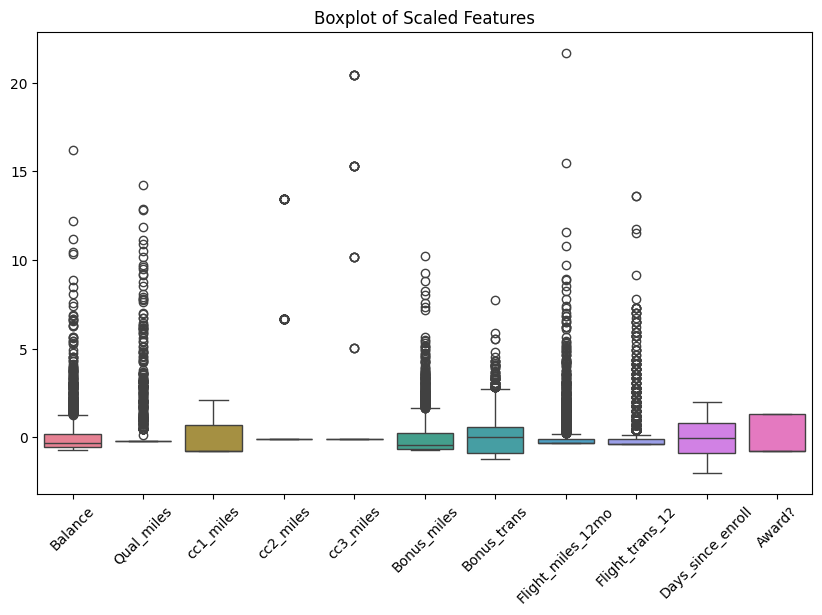

In [6]:
# 3. Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.boxplot(data=pd.DataFrame(data_scaled, columns=data.columns))
plt.xticks(rotation=45)
plt.title("Boxplot of Scaled Features")
plt.show()

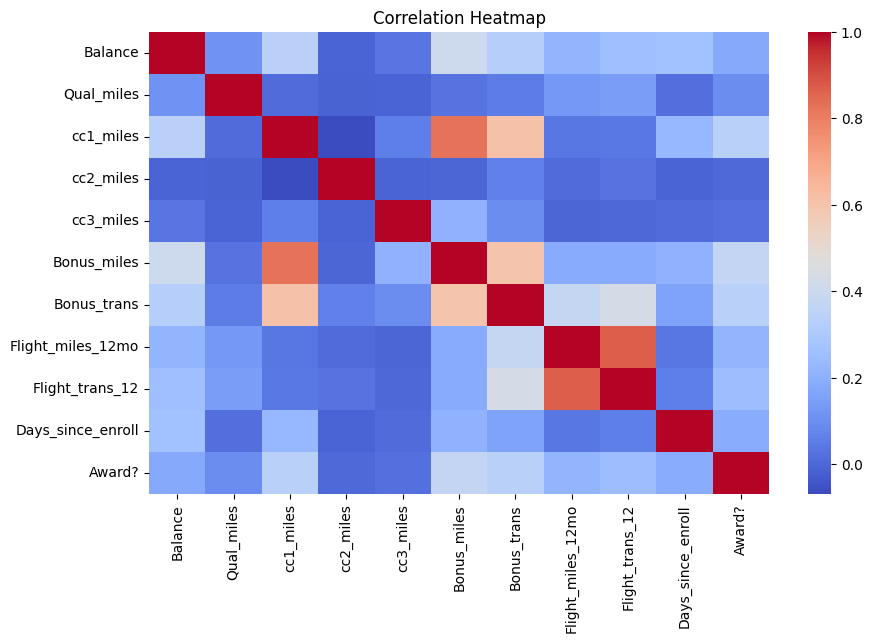

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.DataFrame(data_scaled, columns=data.columns).corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [8]:
# 4. K-Means Clustering
# Elbow method to find optimal K
wcss = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

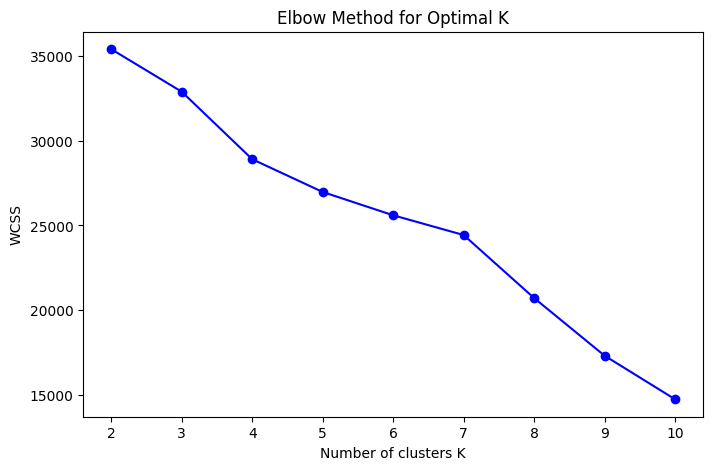

In [9]:
plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters K')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [10]:
# Fit KMeans with optimal K (say 4 based on elbow)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

In [11]:
# Silhouette Score
print("KMeans Silhouette Score:", silhouette_score(data_scaled, kmeans_labels))

KMeans Silhouette Score: 0.19071186813310886


In [12]:
# Visualize clusters (using first 2 PCA components)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(data_scaled)

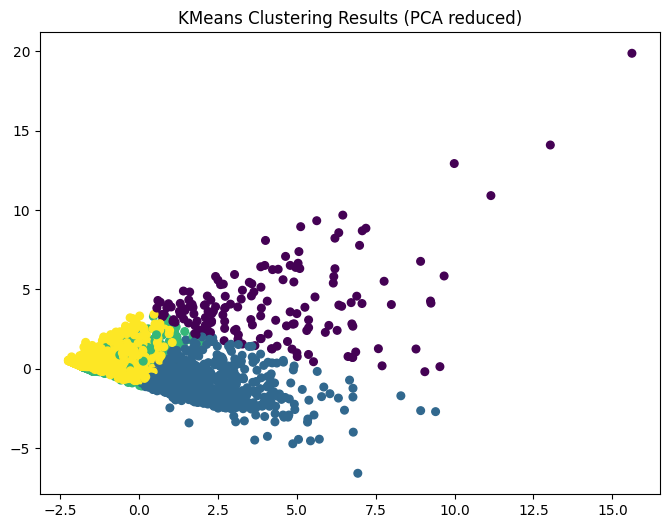

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=kmeans_labels, cmap='viridis', s=30)
plt.title("KMeans Clustering Results (PCA reduced)")
plt.show()

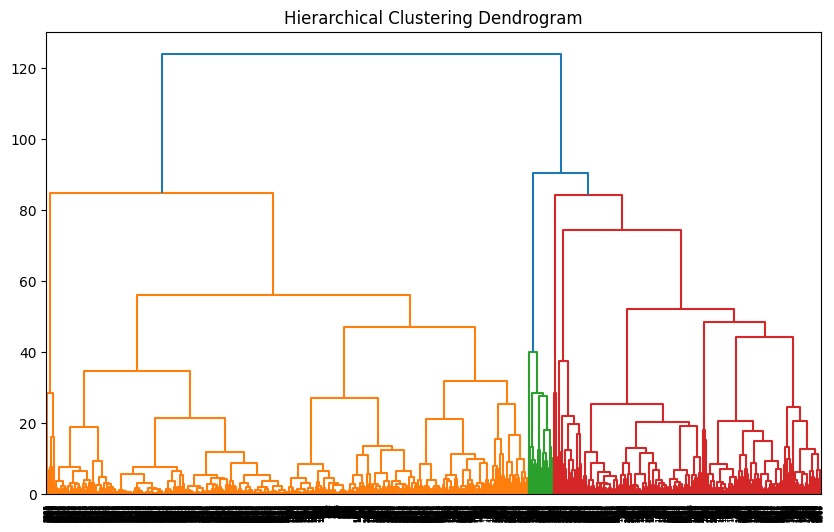

In [14]:
# 5. Hierarchical Clustering
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [15]:
# Fit Agglomerative Clustering (let's pick 4 clusters)
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(data_scaled)

In [16]:
print("Hierarchical Silhouette Score:", silhouette_score(data_scaled, hc_labels))

Hierarchical Silhouette Score: 0.30814152852022786


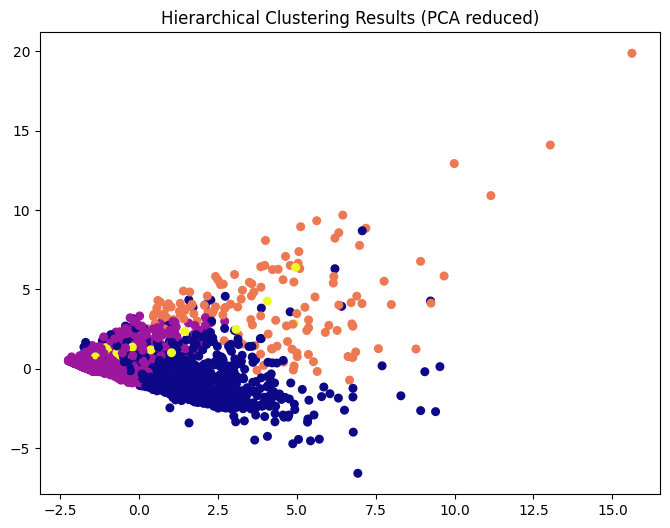

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=hc_labels, cmap='plasma', s=30)
plt.title("Hierarchical Clustering Results (PCA reduced)")
plt.show()

In [18]:
# 6. DBSCAN Clustering
dbscan = DBSCAN(eps=2, min_samples=10)  # parameters to be tuned
db_labels = dbscan.fit_predict(data_scaled)

In [19]:
# Some points might be -1 (noise)
print("DBSCAN Cluster labels:", np.unique(db_labels))

DBSCAN Cluster labels: [-1  0  1  2]


In [20]:
# Silhouette Score (only if >1 clusters found)
if len(set(db_labels)) > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(data_scaled, db_labels))

DBSCAN Silhouette Score: 0.25546923305422986


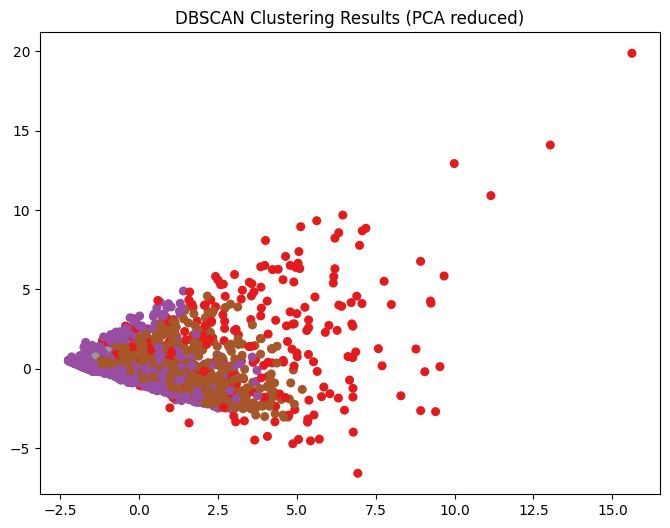

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=db_labels, cmap='Set1', s=30)
plt.title("DBSCAN Clustering Results (PCA reduced)")
plt.show()

In [22]:
# 7. Cluster Analysis & Insights
data_with_clusters = data.copy()
data_with_clusters['KMeans_Cluster'] = kmeans_labels
data_with_clusters['Hierarchical_Cluster'] = hc_labels
data_with_clusters['DBSCAN_Cluster'] = db_labels

In [23]:
# Group by clusters to analyze differences
print("\nCluster Analysis (KMeans):")
print(data_with_clusters.groupby('KMeans_Cluster').mean())


Cluster Analysis (KMeans):
                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                               
0               193291.147436  795.455128   2.179487   1.038462   1.000000   
1               122119.899548  151.724887   3.885068   1.002715   1.043439   
2                59693.586570  112.733010   1.372168   1.031553   1.000809   
3                36920.458056   96.690413   1.269640   1.006658   1.000000   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0               32292.288462    27.628205        5530.230769        16.211538   
1               43772.394570    19.398190         366.520362         1.087783   
2                6311.116505     8.456311         258.830097         0.806634   
3                4897.208389     6.790280         167.861518         0.509321   

                

In [24]:
print("\nCluster Analysis (Hierarchical):")
print(data_with_clusters.groupby('Hierarchical_Cluster').mean())


Cluster Analysis (Hierarchical):
                            Balance  Qual_miles  cc1_miles  cc2_miles  \
Hierarchical_Cluster                                                    
0                     116314.450725  363.839130   3.498551   1.000000   
1                      46329.336877    9.028618   1.244072   1.000000   
2                     134880.892308  393.323077   2.430769   1.000000   
3                      68876.581395   23.255814   1.139535   2.348837   

                      cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Hierarchical_Cluster                                                            
0                      1.035507  37150.356522    18.066667         377.000000   
1                      1.000000   4868.112428     6.907604         214.812756   
2                      1.000000  36582.169231    29.338462        5915.523077   
3                      1.000000  14689.837209    17.534884         582.627907   

                      Flight_trans_12  D

In [25]:
print("\nCluster Analysis (DBSCAN, excluding noise):")
print(data_with_clusters[data_with_clusters['DBSCAN_Cluster']!=-1].groupby('DBSCAN_Cluster').mean())


Cluster Analysis (DBSCAN, excluding noise):
                     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN_Cluster                                                              
0               57638.687142   42.589271   1.696151        1.0        1.0   
1               75894.286043   91.086656   2.638804        1.0        1.0   
2               39218.500000    0.000000   1.000000        2.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
DBSCAN_Cluster                                                                  
0                9779.582719      8.90131         188.470925         0.549550   
1               25364.305215     14.11273         450.680982         1.416411   
2                9189.250000     13.50000         209.375000         0.812500   

                Days_since_enroll  Award?  KMeans_Cluster  \
DBSCAN_Cluster                                              
0                     3813.633907     0.0